# Jumpman23 NYC Analysis(October)

---
## Key Points

#### Goal: 
> - Grow market 20% in next 2 months

#### Current Market Status: 
> - Number of orders grew 10.5% in Oct wk1 to Oct wk4
> - Dinner hours(3pm-9pm) account for more than 2X all other hours combined
> - Lack of deliveries outside Manhattan Island

#### Recommendations: 
> - Give incentives for deliveries outside popular zones during dinner hours(as per map below)
> - Give promotions to one-time customers(Not analyzed in this report)
> - Reasoning against alternatives: Creating time based or return-customer based promotions could cannabilize existing orders
---

## Map of NYC October Orders
---

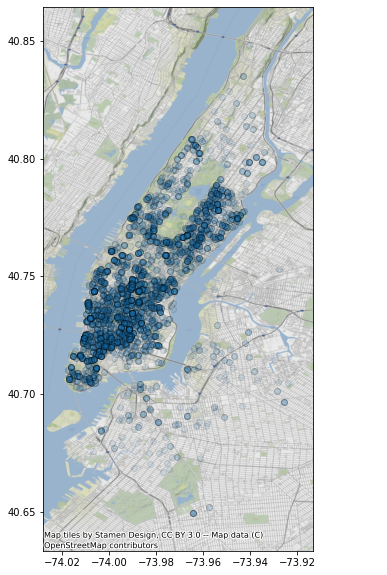

In [118]:
ax = dropoff.plot(figsize = (10,10), alpha=.1, edgecolor='k')
ctx.add_basemap(ax, crs='EPSG:4326', zoom = 15)

## Further Analysis that Could be Done

----

Time Analysis: 

> - Which days are the most busy? What time during the day is the most busy? Have we seen longer wait   times for customers during busy times? Analyzing late deliveries. (This can be broken down by category, geographic area, vehicle type)

Customer Analysis: 

> - One time customers vs. returning customers

Geographic Analysis: 

> - Further breakdown. Where do most late deliveries come from? Popular vehicle per destination analysis?

## Data Integrity(Percent of Values Missing)

---
    Missing Columns                                     Percent of Values Missing
    
    1. How long it took to order:                       ~50%. (no immediate impact)

    2. Item_name/quantity values/category:              ~20%. (slight impact)

    3. Place category(Italian, Chinese, etc):           ~15%. (moderate impact)

    4. When Jumpman arrived/left pickup:                ~8.3%. (no immediate impact)

    5. Dollar Amount/Profit:                            Can we get this data? (high impact)

## Import Libraries
---

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import datetime
%matplotlib inline

In [137]:
dataset = pd.read_csv("analyze_me.csv")
pd.set_option("display.max_rows", 50, "display.max_columns", 50)

## Remove Un-Necessary Columns from Analysis
---

In [138]:
dataset = dataset.drop([
    "jumpman_id", 
    "how_long_it_took_to_order", 
    "item_name", 
    "item_quantity",
    "item_category_name",
    "when_the_Jumpman_arrived_at_pickup", 
    "when_the_Jumpman_left_pickup"],
    axis = 1
)
dataset = dataset.dropna()
#The only missing values after removing columns were in place_category, I checked whether those missing values 
#could be filled in with values from other columns like item_category. 

In [139]:
#Updating columns to datetime
dataset["when_the_delivery_started"] = pd.to_datetime(dataset["when_the_delivery_started"])
dataset["when_the_Jumpman_arrived_at_dropoff"] = pd.to_datetime(dataset["when_the_Jumpman_arrived_at_dropoff"])

## Creating Better Measurements of Time
---

In [140]:
#Extracting date and order hour into separate columns
dataset["date"] = pd.DatetimeIndex(dataset["when_the_delivery_started"]).day
dataset["meal_time"] = pd.DatetimeIndex(dataset["when_the_delivery_started"]).hour

In [141]:
#Grouping order hour into meal times
def group(element):
    if element >= 0 and element <7:
        return "Pre-Breakfast"
    if element >= 7 and element <11:
        return "Breakfast"
    if element >= 11 and element <15:
        return "Lunch"
    if element >= 15 and element <21:
        return "Dinner"
    if element >= 21 and element <=23:
        return "Late-Night"
        
dataset["meal_time"] = dataset["meal_time"].apply(group)

## October Trends
---

Text(0, 0.5, 'Number of Orders')

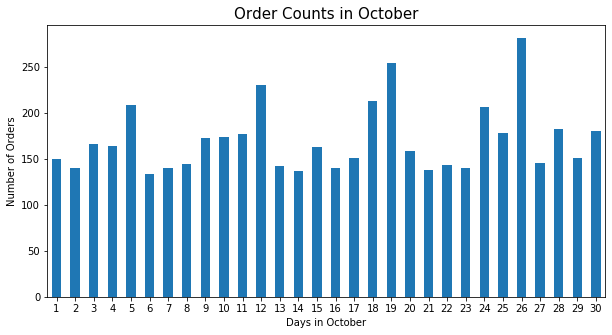

In [147]:
#Creating Visualizations for Orders throughout October
dataset["date"].value_counts().sort_index(axis=0).plot.bar(figsize = (10,5)).grid(False)
plt.xticks(rotation = 0)
plt.title("Order Counts in October", fontsize = 15)
plt.xlabel('Days in October')
plt.ylabel('Number of Orders')

Text(0, 0.5, 'Number of Orders')

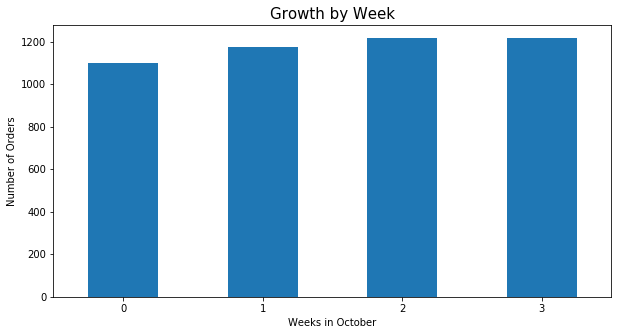

In [148]:
wk1 = dataset["date"].value_counts().sort_index(axis=0).iloc[0:7].sum()
wk2 = dataset["date"].value_counts().sort_index(axis=0).iloc[7:14].sum()
wk3 = dataset["date"].value_counts().sort_index(axis=0).iloc[14:21].sum()
wk4 = dataset["date"].value_counts().sort_index(axis=0).iloc[14:21].sum()
wks = pd.Series([wk1, wk2, wk3, wk4])
wks.plot.bar(figsize = (10,5))
plt.title("Growth by Week", fontsize = 15)
plt.xticks(rotation = 0, label = [1,2,3])
plt.xlabel('Weeks in October')
plt.ylabel('Number of Orders')

Text(0, 0.5, 'Number of Orders')

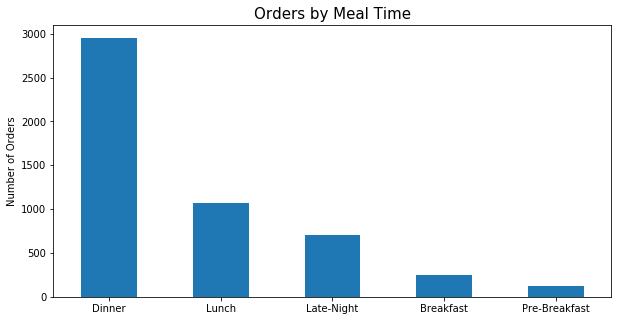

In [149]:
dataset["meal_time"].value_counts().plot.bar(figsize = (10,5)).grid(False)
plt.xticks(rotation = 0)
plt.title("Orders by Meal Time", fontsize = 15)
plt.ylabel('Number of Orders')

## Geographical Analysis
---

In [64]:
dropoff = gpd.GeoDataFrame(dataset, geometry=gpd.points_from_xy(dataset["dropoff_lon"],dataset["dropoff_lat"]))
pickup = gpd.GeoDataFrame(dataset, geometry=gpd.points_from_xy(dataset["pickup_lon"],dataset["pickup_lat"]))

Text(0.5, 1, 'NYC Dropoffs')

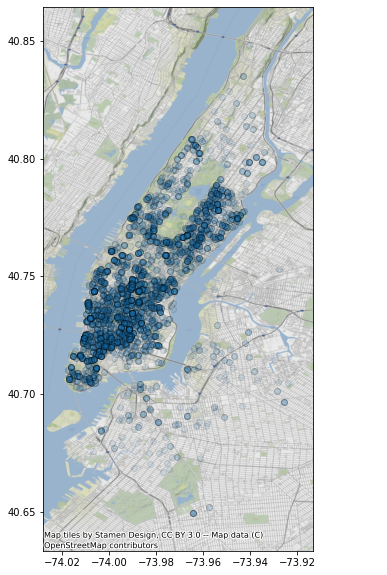

In [153]:
ax = dropoff.plot(figsize = (10,10), alpha=.1, edgecolor='k')
ctx.add_basemap(ax, crs='EPSG:4326', zoom = 15)
fig.suptitle("NYC Dropoffs", fontsize=16, y = 1)

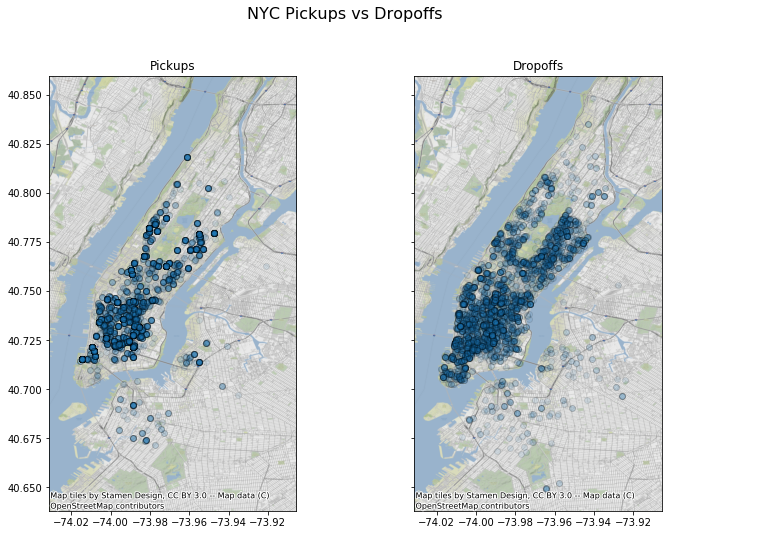

In [152]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex = True, sharey = True, figsize=(12,8))
fig.suptitle("NYC Pickups vs Dropoffs", fontsize=16, y = 1)
pickup.plot(ax=axes[0], alpha=.1, edgecolor='k')
axes[0].set_title("Pickups")
dropoff.plot(ax=axes[1], alpha=.1, edgecolor='k')
axes[1].set_title("Dropoffs")
ctx.add_basemap(axes[0], crs='EPSG:4326', zoom = 15)
ctx.add_basemap(axes[1], crs='EPSG:4326', zoom = 15)